# Field Biodiversity Plot Data Separation

In order to utilize the R package "biodivMapR", each species is bound to have its own shapefile (with no additional information side). That is to say, we need to create the shapefiles as many as the total number of species in the RoI. 

Due to the fact that our plot data are points and each point may contain several samples of the same species, there is bount to be overlapping for each species if they appeared more than once in the field plot. 

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Result = cwd + '\\Results'
cwd_Field = cwd + '\\FieldData'

In [4]:
# read field shapefile and field plot shapefile
shp_Plot = gpd.read_file(cwd_Field + '\\fieldplots.shp')
shp_Field = gpd.read_file(cwd_Field + '\\ShapefileCorretti\\confini_foreste_corretti.shp')

In [5]:
# Read the column list we saved before, due to the 10-character limitation of ESRI shapefile
list_Column = []
with open(cwd_Field + "\\fieldplots.txt") as file:
    for line in file:
        # The last line if a line break, which should be removed
        x = line[:-1]
        list_Column.append(x)

In [6]:
# Assign back the correct column names
shp_Plot_Correct = shp_Plot
shp_Plot_Correct.columns = list_Column

In [7]:
shp_Plot_Correct

,ESU,Nome ESU Campagna 2,Sito_name,Sampling_date,Lat,Long,X_UTM (est),Y_UTM (nord),Piano Dominante - Robinia Pseudoacacia,Piano Dominante - Carpinus Betulus,...,Piano Dominato - Alnus Glutinosa,Piano Dominato - Populus Tremula,Piano Dominato - Quercus Cerris,Piano Dominato - Popolus Nigra,Piano Dominato - Fraxinus Ornus,Piano Dominato - Castanea Sativa Miller,Piano Dominato - Ailanthus Altissima,Piano Dominato - Crataegus Monogyna,Piano Dominato - Copertura,geometry
0,FOR01,FOR44,diga,2022-06-14,45.567978,8.711800,477510.968,5046089.097,10,4,...,0,0,0,0,0,0,0,0,0.8,POINT (477510.968 5046089.097)
1,FOR02,FOR45,diga,2022-06-14,45.570210,8.712502,477566.636,5046336.872,2,0,...,0,0,0,0,0,0,0,0,1.0,POINT (477566.636 5046336.872)
2,FOR03,FOR46,diga,2022-06-14,45.569752,8.713107,477613.662,5046285.820,3,0,...,0,0,0,0,0,0,0,0,0.7,POINT (477613.662 5046285.820)
3,FOR04,FOR40,Bosco cancello,2022-06-16,45.290177,8.936120,494990.757,5015188.194,0,0,...,0,0,0,0,0,0,0,0,0.0,POINT (494990.757 5015188.194)
4,FOR05,FOR41,Bosco cancello,2022-06-16,45.290823,8.938417,495170.934,5015259.820,0,0,...,0,0,0,0,0,0,0,0,0.0,POINT (495170.934 5015259.820)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,FOR78,None,None,2022-11-11,45.656822,8.735793,479415.734,5055953.155,3,0,...,0,0,0,0,0,0,0,0,0.0,POINT (479415.734 5055953.155)
58,FOR79,None,None,2022-11-11,45.656613,8.733727,479254.696,5055930.468,0,0,...,0,0,0,0,0,7,0,0,0.4,POINT (479254.696 5055930.468)
59,FOR80,None,None,2022-11-11,45.663547,8.729593,478935.217,5056701.915,7,0,...,0,0,0,0,0,0,0,0,0.5,POINT (478935.217 5056701.915)
60,FOR81,None,None,2022-11-11,45.665172,8.722593,478390.540,5056884.318,2,0,...,0,0,0,0,0,0,0,0,0.3,POINT (478390.540 5056884.318)


In [8]:
# Calculate how many samples in each month
import pandas as pd
shp_Plot_Correct["Sampling_date"] = pd.to_datetime(shp_Plot_Correct["Sampling_date"])
shp_Plot_Correct.groupby(shp_Plot_Correct["Sampling_date"].dt.month).count()

,ESU,Nome ESU Campagna 2,Sito_name,Sampling_date,Lat,Long,X_UTM (est),Y_UTM (nord),Piano Dominante - Robinia Pseudoacacia,Piano Dominante - Carpinus Betulus,...,Piano Dominato - Alnus Glutinosa,Piano Dominato - Populus Tremula,Piano Dominato - Quercus Cerris,Piano Dominato - Popolus Nigra,Piano Dominato - Fraxinus Ornus,Piano Dominato - Castanea Sativa Miller,Piano Dominato - Ailanthus Altissima,Piano Dominato - Crataegus Monogyna,Piano Dominato - Copertura,geometry
Sampling_date,,,,,,,,,,,,,,,,,,,,,
6,21,17,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
7,10,2,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
10,24,0,0,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
11,7,0,0,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [9]:
# Get the list to save all the plants name
list_Spezie = []
for spezie in shp_Plot_Correct.columns:
    if (not "Copertura" in spezie) and (" - " in spezie):
        list_Spezie.append(spezie)
list_Spezie

['Piano Dominante - Robinia Pseudoacacia',
 'Piano Dominante - Carpinus Betulus',
 'Piano Dominante - Quercus Robur ',
 'Piano Dominante - Populus Canadensis',
 'Piano Dominante - Alnus Glutinosa',
 'Piano Dominante - Prunus Serotina',
 'Piano Dominante - Malus Sylvestris',
 'Piano Dominante - Populus Tremula',
 'Piano Dominante - Prunus Avium',
 'Piano Dominante - Popolus Nigra',
 'Piano Dominante - Quercus Cerris',
 'Piano Dominante - Populus Cane scens',
 'Piano Dominante - Pinus Rigida',
 'Piano Dominante - Pinus Sylvestris',
 'Piano Dominante - Castanea Sativa Miller',
 'Piano Dominante - Betula Pendula',
 'Piano Dominante - Ailanthus Altissima',
 'Piano Dominante - Ulmus Minor Miller',
 'Piano Dominante - Fraxinus Ornus',
 'Piano Dominante - Quercus Pubescens',
 'Piano Dominato - Prunus Padus',
 'Piano Dominato - Robinia Pseudoacacia',
 'Piano Dominato - Carpinus Betulus',
 'Piano Dominato - Pronus Serotina',
 'Piano Dominato - Malus Sylvestris',
 'Piano Dominato - Prunus Avium',

In [10]:
# Create the lists which will save plants in dominato and dominante
list_Spezie_Dominato = []
list_Spezie_Dominante = []
for spezie in list_Spezie:
    if "Dominato" in spezie:
        list_Spezie_Dominato.append(spezie.split(" - ")[1])
    elif "Dominante" in spezie:
        list_Spezie_Dominante.append(spezie.split(" - ")[1])
list_Spezie_Dominato

['Prunus Padus',
 'Robinia Pseudoacacia',
 'Carpinus Betulus',
 'Pronus Serotina',
 'Malus Sylvestris',
 'Prunus Avium',
 'Quercus Robur ',
 'Ulmus Minor',
 'Acer Campestre',
 'Alnus Glutinosa',
 'Populus Tremula',
 'Quercus Cerris',
 'Popolus Nigra',
 'Fraxinus Ornus',
 'Castanea Sativa Miller',
 'Ailanthus Altissima',
 'Crataegus Monogyna']

In [11]:
# Sum up the counts of the same plants in "Piano Dominante" and "Piano Dominato". 
shp_Plot_Final = shp_Plot_Correct
for spezie_Dominante in list_Spezie_Dominante:
    # Set a check value in case that a plant only exists in "Piano Dominante"
    spezie_unique = True
    for spezie_Dominato in list_Spezie_Dominato: 
        if spezie_Dominante == spezie_Dominato:
            # Add up the counts if the plant exists in both "Piano Dominante" and "Piano Dominato"
            shp_Plot_Final[spezie_Dominante] = shp_Plot_Final[("Piano Dominante - " + spezie_Dominante)] + shp_Plot_Final[("Piano Dominato - " + spezie_Dominato)]
            # Drop the two columns! 
            shp_Plot_Final = shp_Plot_Final.drop(columns = [("Piano Dominante - " + spezie_Dominante),("Piano Dominato - " + spezie_Dominato)], axis = 0)
            spezie_unique = False
            break
    # If the plant only exists in "Piano Dominante", then no need to add any arithmetric operation! 
    if spezie_unique:
        shp_Plot_Final[spezie_Dominante] = shp_Plot_Final[("Piano Dominante - " + spezie_Dominante)]
        shp_Plot_Final = shp_Plot_Final.drop(columns = [("Piano Dominante - " + spezie_Dominante)], axis = 0)
# Now only the plants unique in "Piano Dominato" remain intact in the geodataframe. We simply rename their names! 
for column in shp_Plot_Final.columns: 
    if ("Piano Dominato" in column) and (not "Copertura" in column):
        shp_Plot_Final = shp_Plot_Final.rename(columns={column: column.split(" - ")[1]})
# Finally check our columns of the final dataframe! 
shp_Plot_Final

,ESU,Nome ESU Campagna 2,Sito_name,Sampling_date,Lat,Long,X_UTM (est),Y_UTM (nord),Piano Dominante - Copertura,Prunus Padus,...,Quercus Cerris,Populus Cane scens,Pinus Rigida,Pinus Sylvestris,Castanea Sativa Miller,Betula Pendula,Ailanthus Altissima,Ulmus Minor Miller,Fraxinus Ornus,Quercus Pubescens
0,FOR01,FOR44,diga,2022-06-14,45.567978,8.711800,477510.968,5046089.097,0.6,7,...,0,0,0,0,0,0,0,0,0,0
1,FOR02,FOR45,diga,2022-06-14,45.570210,8.712502,477566.636,5046336.872,0.4,0,...,0,0,0,0,0,0,0,0,0,0
2,FOR03,FOR46,diga,2022-06-14,45.569752,8.713107,477613.662,5046285.820,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,FOR04,FOR40,Bosco cancello,2022-06-16,45.290177,8.936120,494990.757,5015188.194,0.4,0,...,0,2,0,0,0,0,0,0,0,0
4,FOR05,FOR41,Bosco cancello,2022-06-16,45.290823,8.938417,495170.934,5015259.820,0.3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,FOR78,None,None,2022-11-11,45.656822,8.735793,479415.734,5055953.155,1.0,0,...,0,0,0,0,0,0,0,0,0,0
58,FOR79,None,None,2022-11-11,45.656613,8.733727,479254.696,5055930.468,0.5,0,...,0,0,0,8,8,0,0,0,0,0
59,FOR80,None,None,2022-11-11,45.663547,8.729593,478935.217,5056701.915,0.4,0,...,0,0,0,0,0,0,0,0,0,0
60,FOR81,None,None,2022-11-11,45.665172,8.722593,478390.540,5056884.318,0.5,0,...,0,0,0,5,0,0,0,0,0,0


# Calculation of the Shannon Index! 

In [12]:
# Fisrt we need to get all the names of the species without "Piano - Dominante" or "Piano - Dominato"
list_Spezie_Name = []
for column in shp_Plot_Final:
    if (column in list_Spezie_Dominante) or (column in list_Spezie_Dominato):
        list_Spezie_Name.append(column)
list_Spezie_Name

['Prunus Padus',
 'Pronus Serotina',
 'Ulmus Minor',
 'Acer Campestre',
 'Crataegus Monogyna',
 'Robinia Pseudoacacia',
 'Carpinus Betulus',
 'Quercus Robur ',
 'Populus Canadensis',
 'Alnus Glutinosa',
 'Prunus Serotina',
 'Malus Sylvestris',
 'Populus Tremula',
 'Prunus Avium',
 'Popolus Nigra',
 'Quercus Cerris',
 'Populus Cane scens',
 'Pinus Rigida',
 'Pinus Sylvestris',
 'Castanea Sativa Miller',
 'Betula Pendula',
 'Ailanthus Altissima',
 'Ulmus Minor Miller',
 'Fraxinus Ornus',
 'Quercus Pubescens']

In [13]:
# Now we start to calculate the Shannon index for each plot site! 
# In order to simplify the calculation, we need to create some additional columns which will the save interim values. 
shp_Plot_Shannon = shp_Plot_Final
# First, create a column to save the total number of the species! 
shp_Plot_Shannon['Count'] = shp_Plot_Shannon.loc[:, list_Spezie_Name].sum(axis = 1)
shp_Plot_Shannon

,ESU,Nome ESU Campagna 2,Sito_name,Sampling_date,Lat,Long,X_UTM (est),Y_UTM (nord),Piano Dominante - Copertura,Prunus Padus,...,Populus Cane scens,Pinus Rigida,Pinus Sylvestris,Castanea Sativa Miller,Betula Pendula,Ailanthus Altissima,Ulmus Minor Miller,Fraxinus Ornus,Quercus Pubescens,Count
0,FOR01,FOR44,diga,2022-06-14,45.567978,8.711800,477510.968,5046089.097,0.6,7,...,0,0,0,0,0,0,0,0,0,34
1,FOR02,FOR45,diga,2022-06-14,45.570210,8.712502,477566.636,5046336.872,0.4,0,...,0,0,0,0,0,0,0,0,0,40
2,FOR03,FOR46,diga,2022-06-14,45.569752,8.713107,477613.662,5046285.820,1.0,0,...,0,0,0,0,0,0,0,0,0,36
3,FOR04,FOR40,Bosco cancello,2022-06-16,45.290177,8.936120,494990.757,5015188.194,0.4,0,...,2,0,0,0,0,0,0,0,0,11
4,FOR05,FOR41,Bosco cancello,2022-06-16,45.290823,8.938417,495170.934,5015259.820,0.3,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,FOR78,None,None,2022-11-11,45.656822,8.735793,479415.734,5055953.155,1.0,0,...,0,0,0,0,0,0,0,0,0,36
58,FOR79,None,None,2022-11-11,45.656613,8.733727,479254.696,5055930.468,0.5,0,...,0,0,8,8,0,0,0,0,0,25
59,FOR80,None,None,2022-11-11,45.663547,8.729593,478935.217,5056701.915,0.4,0,...,0,0,0,0,0,0,0,0,0,30
60,FOR81,None,None,2022-11-11,45.665172,8.722593,478390.540,5056884.318,0.5,0,...,0,0,5,0,0,0,0,0,0,30


In [14]:
# Now we need to calculate the propotion of each species! 
for spezie in list_Spezie_Name:
    # Calculate the Pi
    temp_proportion = shp_Plot_Shannon.loc[:,spezie] / shp_Plot_Shannon['Count']
    # Mask where Pi = 0
    temp_masked = temp_proportion.mask(temp_proportion == 0)
    # Calculate ln(Pi)
    temp_ln = np.log(temp_masked)
    # Calculate Pi * ln(Pi)
    temp_multiplied = temp_proportion * temp_ln
    # Save as a new column
    shp_Plot_Shannon[spezie + " Pi*ln(Pi)"] = temp_multiplied
pd.set_option('display.max_columns', None)
shp_Plot_Shannon
# shp_Plot_Shannon

,ESU,Nome ESU Campagna 2,Sito_name,Sampling_date,Lat,Long,X_UTM (est),Y_UTM (nord),Piano Dominante - Copertura,Prunus Padus,Pronus Serotina,Ulmus Minor,Acer Campestre,Crataegus Monogyna,Piano Dominato - Copertura,geometry,Robinia Pseudoacacia,Carpinus Betulus,Quercus Robur,Populus Canadensis,Alnus Glutinosa,Prunus Serotina,Malus Sylvestris,Populus Tremula,Prunus Avium,Popolus Nigra,Quercus Cerris,Populus Cane scens,Pinus Rigida,Pinus Sylvestris,Castanea Sativa Miller,Betula Pendula,Ailanthus Altissima,Ulmus Minor Miller,Fraxinus Ornus,Quercus Pubescens,Count,Prunus Padus Pi*ln(Pi),Pronus Serotina Pi*ln(Pi),Ulmus Minor Pi*ln(Pi),Acer Campestre Pi*ln(Pi),Crataegus Monogyna Pi*ln(Pi),Robinia Pseudoacacia Pi*ln(Pi),Carpinus Betulus Pi*ln(Pi),Quercus Robur Pi*ln(Pi),Populus Canadensis Pi*ln(Pi),Alnus Glutinosa Pi*ln(Pi),Prunus Serotina Pi*ln(Pi),Malus Sylvestris Pi*ln(Pi),Populus Tremula Pi*ln(Pi),Prunus Avium Pi*ln(Pi),Popolus Nigra Pi*ln(Pi),Quercus Cerris Pi*ln(Pi),Populus Cane scens Pi*ln(Pi),Pinus Rigida Pi*ln(Pi),Pinus Sylvestris Pi*ln(Pi),Castanea Sativa Miller Pi*ln(Pi),Betula Pendula Pi*ln(Pi),Ailanthus Altissima Pi*ln(Pi),Ulmus Minor Miller Pi*ln(Pi),Fraxinus Ornus Pi*ln(Pi),Quercus Pubescens Pi*ln(Pi)
0,FOR01,FOR44,diga,2022-06-14,45.567978,8.711800,477510.968,5046089.097,0.6,7,0,0,0,0,0.8,POINT (477510.968 5046089.097),12,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,-0.325387,NaN,NaN,NaN,NaN,-0.367572,-0.367598,-0.103716,-0.103716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FOR02,FOR45,diga,2022-06-14,45.570210,8.712502,477566.636,5046336.872,0.4,0,15,0,0,0,1.0,POINT (477566.636 5046336.872),2,0,5,0,2,11,4,0,1,0,0,0,0,0,0,0,0,0,0,0,40,NaN,-0.367811,NaN,NaN,NaN,-0.149787,NaN,-0.259930,NaN,-0.149787,-0.355021,-0.230259,NaN,-0.092222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FOR03,FOR46,diga,2022-06-14,45.569752,8.713107,477613.662,5046285.820,1.0,0,0,0,0,0,0.7,POINT (477613.662 5046285.820),3,0,1,0,0,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,36,NaN,NaN,NaN,NaN,NaN,-0.207076,NaN,-0.099542,NaN,NaN,-0.128763,-0.099542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FOR04,FOR40,Bosco cancello,2022-06-16,45.290177,8.936120,494990.757,5015188.194,0.4,0,0,0,0,0,0.0,POINT (494990.757 5015188.194),0,0,9,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.164185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.309954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FOR05,FOR41,Bosco cancello,2022-06-16,45.290823,8.938417,495170.934,5015259.820,0.3,0,0,0,0,0,0.0,POINT (495170.934 5015259.820),0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,FOR78,None,None,2022-11-11,45.656822,8.735793,479415.734,5055953.155,1.0,0,0,0,0,0,0.0,POINT (479415.734 5055953.155),3,0,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,NaN,NaN,NaN,NaN,NaN,-0.207076,NaN,NaN,NaN,NaN,-0.079760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,FOR79,None,None,2022-11-11,45.656613,8.733727,479254.696,5055930.468,0.5,0,5,0,0,0,0.4,POINT (479254.696 5055930.468),0,0,4,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,0,25,NaN,-0.321888,NaN,NaN,NaN,NaN,NaN,-0.293213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.364619,-0.364619,NaN,NaN,NaN,NaN,NaN
59,FOR80,None,None,2022-11-11,45.663547,8.729593,478935.217,5056701.915,0.4,0,17,0,0,0,0.5,POINT (478935.217 5056701.915),10,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,NaN,-0.321858,NaN,NaN,NaN,-0.366204,NaN,-0.230259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,FOR81,None,None,2022-11-11,45.665172,8.722593,478390.540,5056884.318,0.5,0,11,0,0,0,0.3,POINT (478390.540 5056884.318),4,0,10,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,30,NaN,-0.367877,NaN,NaN,NaN,-0.268654,NaN,-0.366204

In [15]:
# Finally calculate the Shannon Index! 
list_Spezie_Name_Pi = []
for name in list_Spezie_Name:
    temp_name = name + " Pi*ln(Pi)"
    list_Spezie_Name_Pi.append(temp_name)
shp_Plot_Shannon['Shannon'] = shp_Plot_Shannon.loc[:,list_Spezie_Name_Pi].sum(axis = 1) * (-1)
shp_Plot_Shannon = shp_Plot_Shannon.drop(columns = list_Spezie_Name_Pi)
shp_Plot_Shannon

,ESU,Nome ESU Campagna 2,Sito_name,Sampling_date,Lat,Long,X_UTM (est),Y_UTM (nord),Piano Dominante - Copertura,Prunus Padus,Pronus Serotina,Ulmus Minor,Acer Campestre,Crataegus Monogyna,Piano Dominato - Copertura,geometry,Robinia Pseudoacacia,Carpinus Betulus,Quercus Robur,Populus Canadensis,Alnus Glutinosa,Prunus Serotina,Malus Sylvestris,Populus Tremula,Prunus Avium,Popolus Nigra,Quercus Cerris,Populus Cane scens,Pinus Rigida,Pinus Sylvestris,Castanea Sativa Miller,Betula Pendula,Ailanthus Altissima,Ulmus Minor Miller,Fraxinus Ornus,Quercus Pubescens,Count,Shannon
0,FOR01,FOR44,diga,2022-06-14,45.567978,8.711800,477510.968,5046089.097,0.6,7,0,0,0,0,0.8,POINT (477510.968 5046089.097),12,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,1.267990
1,FOR02,FOR45,diga,2022-06-14,45.570210,8.712502,477566.636,5046336.872,0.4,0,15,0,0,0,1.0,POINT (477566.636 5046336.872),2,0,5,0,2,11,4,0,1,0,0,0,0,0,0,0,0,0,0,0,40,1.604816
2,FOR03,FOR46,diga,2022-06-14,45.569752,8.713107,477613.662,5046285.820,1.0,0,0,0,0,0,0.7,POINT (477613.662 5046285.820),3,0,1,0,0,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0.534923
3,FOR04,FOR40,Bosco cancello,2022-06-16,45.290177,8.936120,494990.757,5015188.194,0.4,0,0,0,0,0,0.0,POINT (494990.757 5015188.194),0,0,9,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,11,0.474139
4,FOR05,FOR41,Bosco cancello,2022-06-16,45.290823,8.938417,495170.934,5015259.820,0.3,0,0,0,0,0,0.0,POINT (495170.934 5015259.820),0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,FOR78,None,None,2022-11-11,45.656822,8.735793,479415.734,5055953.155,1.0,0,0,0,0,0,0.0,POINT (479415.734 5055953.155),3,0,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0.286836
58,FOR79,None,None,2022-11-11,45.656613,8.733727,479254.696,5055930.468,0.5,0,5,0,0,0,0.4,POINT (479254.696 5055930.468),0,0,4,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,0,25,1.344339
59,FOR80,None,None,2022-11-11,45.663547,8.729593,478935.217,5056701.915,0.4,0,17,0,0,0,0.5,POINT (478935.217 5056701.915),10,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0.918320
60,FOR81,None,None,2022-11-11,45.665172,8.722593,478390.540,5056884.318,0.5,0,11,0,0,0,0.3,POINT (478390.540 5056884.318),4,0,10,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,30,1.301362


In [16]:
shp_Plot_Shannon_Buffer = shp_Plot_Shannon
shp_Plot_Shannon_Buffer['geometry'] = shp_Plot_Shannon_Buffer.geometry.buffer(15, cap_style = 3)

In [20]:
xmin = shp_Plot_Shannon_Buffer.bounds.iloc[0,0]
ymin = shp_Plot_Shannon_Buffer.bounds.iloc[0,1]
xmax = shp_Plot_Shannon_Buffer.bounds.iloc[0,2]
ymax = shp_Plot_Shannon_Buffer.bounds.iloc[0,3]

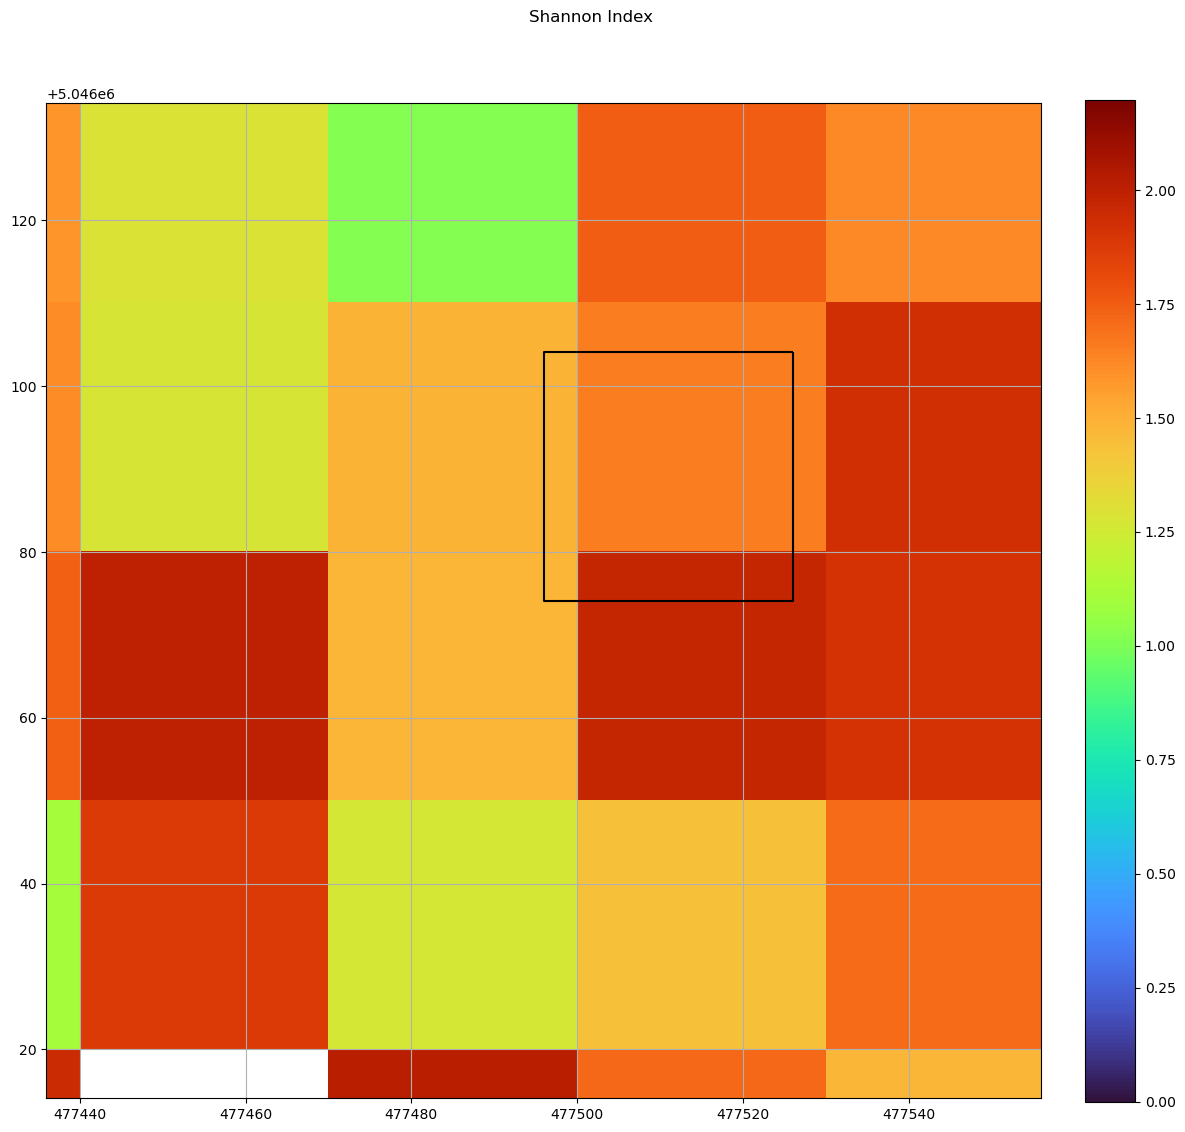

In [21]:
import matplotlib.pyplot as plt
from osgeo import gdal
import rasterio as rio
from rasterio.plot import show
temp = rio.open(cwd_Result + "\\" + "2022 06Cropped" + "\\SPCA\\Alpha\\Shannon_3")
fig, ax = plt.subplots(1, figsize = (12, 12))
image_hidden = ax.imshow(temp.read()[0], 
                        cmap='turbo')
shp_Plot_Shannon_Buffer.boundary.plot(ax = ax, edgecolor='black')
show(temp, ax = ax, cmap = 'turbo')
fig.suptitle("Shannon Index")
fig.colorbar(image_hidden, ax=ax, fraction=0.046, pad=0.04)
fig.tight_layout()
# ax.set_xlim(481000,481300)
# ax.set_ylim(5062100, 5062400)
ax.set_xlim(xmin - 2*(xmax - xmin), xmin + 2*(xmax-xmin))
ax.set_ylim(ymin - 2*(ymax - ymin), ymin + 2*(ymax-ymin))
# plt.xticks(np.arange(xmin - 2*(xmax - xmin) - 6 - 20, xmin + 2*(xmax-xmin) - 6 - 20, 100))
# plt.yticks(np.arange(ymin - 2*(ymax - ymin) - 4 + 10, ymin + 2*(ymax-ymin) - 4, 100))
plt.grid()

In [ ]:
# The Shannon Index raster has a resolution of 100m x 100m, but our field plot has a resolution of 30m x 30m. Hence, we need to assign our field plot to one or several Shannon pixel(s). 

# We need to get the pixels on which our field plot falls. 

In [ ]:
# Get the raster bounds! 
raster_data = temp.read(1)
raster_xmin = temp.bounds.left
raster_ymin = temp.bounds.bottom
raster_xmax = temp.bounds.right
raster_ymax = temp.bounds.top
raster_column = temp.width
raster_row = temp.height

# Onhold!

In [73]:
# Get the raster bounds! 
raster_data = temp.read(1)
raster_xmin = temp.bounds.left
raster_ymin = temp.bounds.bottom
raster_xmax = temp.bounds.right
raster_ymax = temp.bounds.top
raster_column = temp.width
raster_row = temp.height
print(raster_xmax - raster_xmin)
print(raster_ymax - raster_ymin)

68900.0
68900.0


In [75]:
# Get all the pixels inside the field plot polygon!

# First let us get the "boundary" of the square where the pixels should fall within. This can be obtained from the bounding box of our field plot polygon! 
import math
resolution = 100
ceil_xmin = int(math.ceil(xmin / resolution) * resolution)
ceil_ymin = int(math.ceil(ymin / resolution) * resolution)
floor_xmax = int(math.floor(xmax / resolution) * resolution)
floor_ymax = int(math.floor(ymax / resolution) * resolution)
ceil_ymin

5046100

In [76]:
column_xmin = int((ceil_xmin - raster_xmin) / 100)
column_xmax = int((floor_xmax - raster_xmin) / 100)
row_ymin = int((ceil_ymin - raster_ymin) / 100)
row_ymax = int((floor_ymax - raster_ymin) / 100)
row_ymax

455

In [77]:
raster_data[row_ymin:row_ymax, column_xmin:column_xmax]

array([], shape=(0, 0), dtype=float32)

In [19]:
# Start to create separate shapefiles for each plant! The copertura will be included and the dominante and the dominato will be separated as well. 
# For now, we need to sum up the same plant in "piano dominato" and "piano dominante". Later we will separate them. 
gdf0 = shp_Plot_Final
for column in gdf0.columns:
    if "Dominante" in list_Spezie[0]:
        if (" - " in column) and (not "Piano Dominante - Copertura" in column):
            if column != list_Spezie[0]:
                gdf0 = gdf0.drop(columns = column)
    elif "Dominato" in list_Spezie[0]:
        if (" - " in column) and (not "Piano Dominato - Copertura" in column):
            if column != list_Spezie[0]:
                gdf0 = gdf0.drop(columns = column)
gdf0

,ESU,Nome ESU Campagna 2,Sito_name,Sampling_date,Lat,Long,X_UTM (est),Y_UTM (nord),Piano Dominante - Copertura,Prunus Padus,...,Populus Cane scens Pi*ln(Pi),Pinus Rigida Pi*ln(Pi),Pinus Sylvestris Pi*ln(Pi),Castanea Sativa Miller Pi*ln(Pi),Betula Pendula Pi*ln(Pi),Ailanthus Altissima Pi*ln(Pi),Ulmus Minor Miller Pi*ln(Pi),Fraxinus Ornus Pi*ln(Pi),Quercus Pubescens Pi*ln(Pi),Shannon
0,FOR01,FOR44,diga,2022-06-14,45.567978,8.711800,477510.968,5046089.097,0.6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.267990
1,FOR02,FOR45,diga,2022-06-14,45.570210,8.712502,477566.636,5046336.872,0.4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.604816
2,FOR03,FOR46,diga,2022-06-14,45.569752,8.713107,477613.662,5046285.820,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534923
3,FOR04,FOR40,Bosco cancello,2022-06-16,45.290177,8.936120,494990.757,5015188.194,0.4,0,...,-0.309954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.474139
4,FOR05,FOR41,Bosco cancello,2022-06-16,45.290823,8.938417,495170.934,5015259.820,0.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,FOR78,None,None,2022-11-11,45.656822,8.735793,479415.734,5055953.155,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286836
58,FOR79,None,None,2022-11-11,45.656613,8.733727,479254.696,5055930.468,0.5,0,...,NaN,NaN,-0.364619,-0.364619,NaN,NaN,NaN,NaN,NaN,1.344339
59,FOR80,None,None,2022-11-11,45.663547,8.729593,478935.217,5056701.915,0.4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.918320
60,FOR81,None,None,2022-11-11,45.665172,8.722593,478390.540,5056884.318,0.5,0,...,NaN,NaN,-0.298627,NaN,NaN,NaN,NaN,NaN,NaN,1.301362


In [20]:
# Iterate through each row to drop the value where the number of the plant is equal to 0. 
count = 0
row_discard = []
for row in gdf0[list_Spezie[0]]:
    if row == 0:
        row_discard.append(count)
    count = count + 1
gdf0_Final = gdf0.drop(index = row_discard).reset_index().drop(columns=['index'])
gdf0_Final

KeyError: 'Piano Dominante - Robinia Pseudoacacia'